In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import re
import mailbox

from datetime import datetime as dt
from dateutil import tz

In [2]:
#Load file 'datafile.csv' to df
df = pd.read_csv('datafile.csv')

In [3]:
#check the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999998 entries, 0 to 9999997
Data columns (total 8 columns):
Unnamed: 0       int64
event_time       object
event_type       object
product_id       int64
category_code    object
brand            object
price            float64
user_id          int64
dtypes: float64(1), int64(3), object(4)
memory usage: 610.4+ MB


In [4]:
#check the df feature
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id
0,3967559,2019-10-04 08:11:58 UTC,view,1001588,electronics.smartphone,meizu,128.26,525199888
1,2628431,2019-10-03 05:53:24 UTC,view,1001588,electronics.smartphone,meizu,128.28,518720832
2,51776,2019-10-01 03:35:11 UTC,view,1001588,electronics.smartphone,meizu,128.31,554199941
3,2628354,2019-10-03 05:53:19 UTC,view,1001588,electronics.smartphone,meizu,128.28,518720832
4,4701726,2019-10-04 16:41:49 UTC,view,1001588,electronics.smartphone,meizu,128.25,556792578


In [5]:
# products been view and purchase comparing
product_event = pd.pivot_table(df, index='product_id', columns='event_type', values='price', aggfunc='count',fill_value = 0)
product_event.head()

event_type,cart,purchase,view
product_id,,,
1000978,0,0,20
1001588,0,3,460
1001606,0,0,4
1002042,5,3,300
1002062,0,5,63


In [234]:
##add new 3 columns. Ratio of customer behaviors    
product_eventvalid = product_event.loc[product_event.purchase > 5].reset_index().sort_values(by=['purchase'], ascending = False).head(100)
eventtotal = product_eventvalid['product_id']

purchase = product_eventvalid.groupby(by = eventtotal)['purchase'].sum()
view = product_eventvalid.groupby(by = eventtotal)['view'].sum()
cart = product_eventvalid.groupby(by = eventtotal)['cart'].sum()

purchased_by_viewed = purchase/view
carted_by_viewed = cart/view
purchased_by_carted = purchase/cart
purchased_by_viewed

product_id
1002524     0.053320
1002532     0.039164
1002544     0.054313
1002547     0.043134
1002629     0.043949
              ...   
5100572     0.037136
5100816     0.039444
10701101    0.060168
12703015    0.028979
12703498    0.024386
Length: 100, dtype: float64

Generally, when users make online purchases, they will be accustomed to browsing first, putting them into the shopping cart, and finally paying for the product. But is this hypothesis true? Is there a necessary connection between the three behaviors? I am interested in this, so I made an analysis chart as follows:

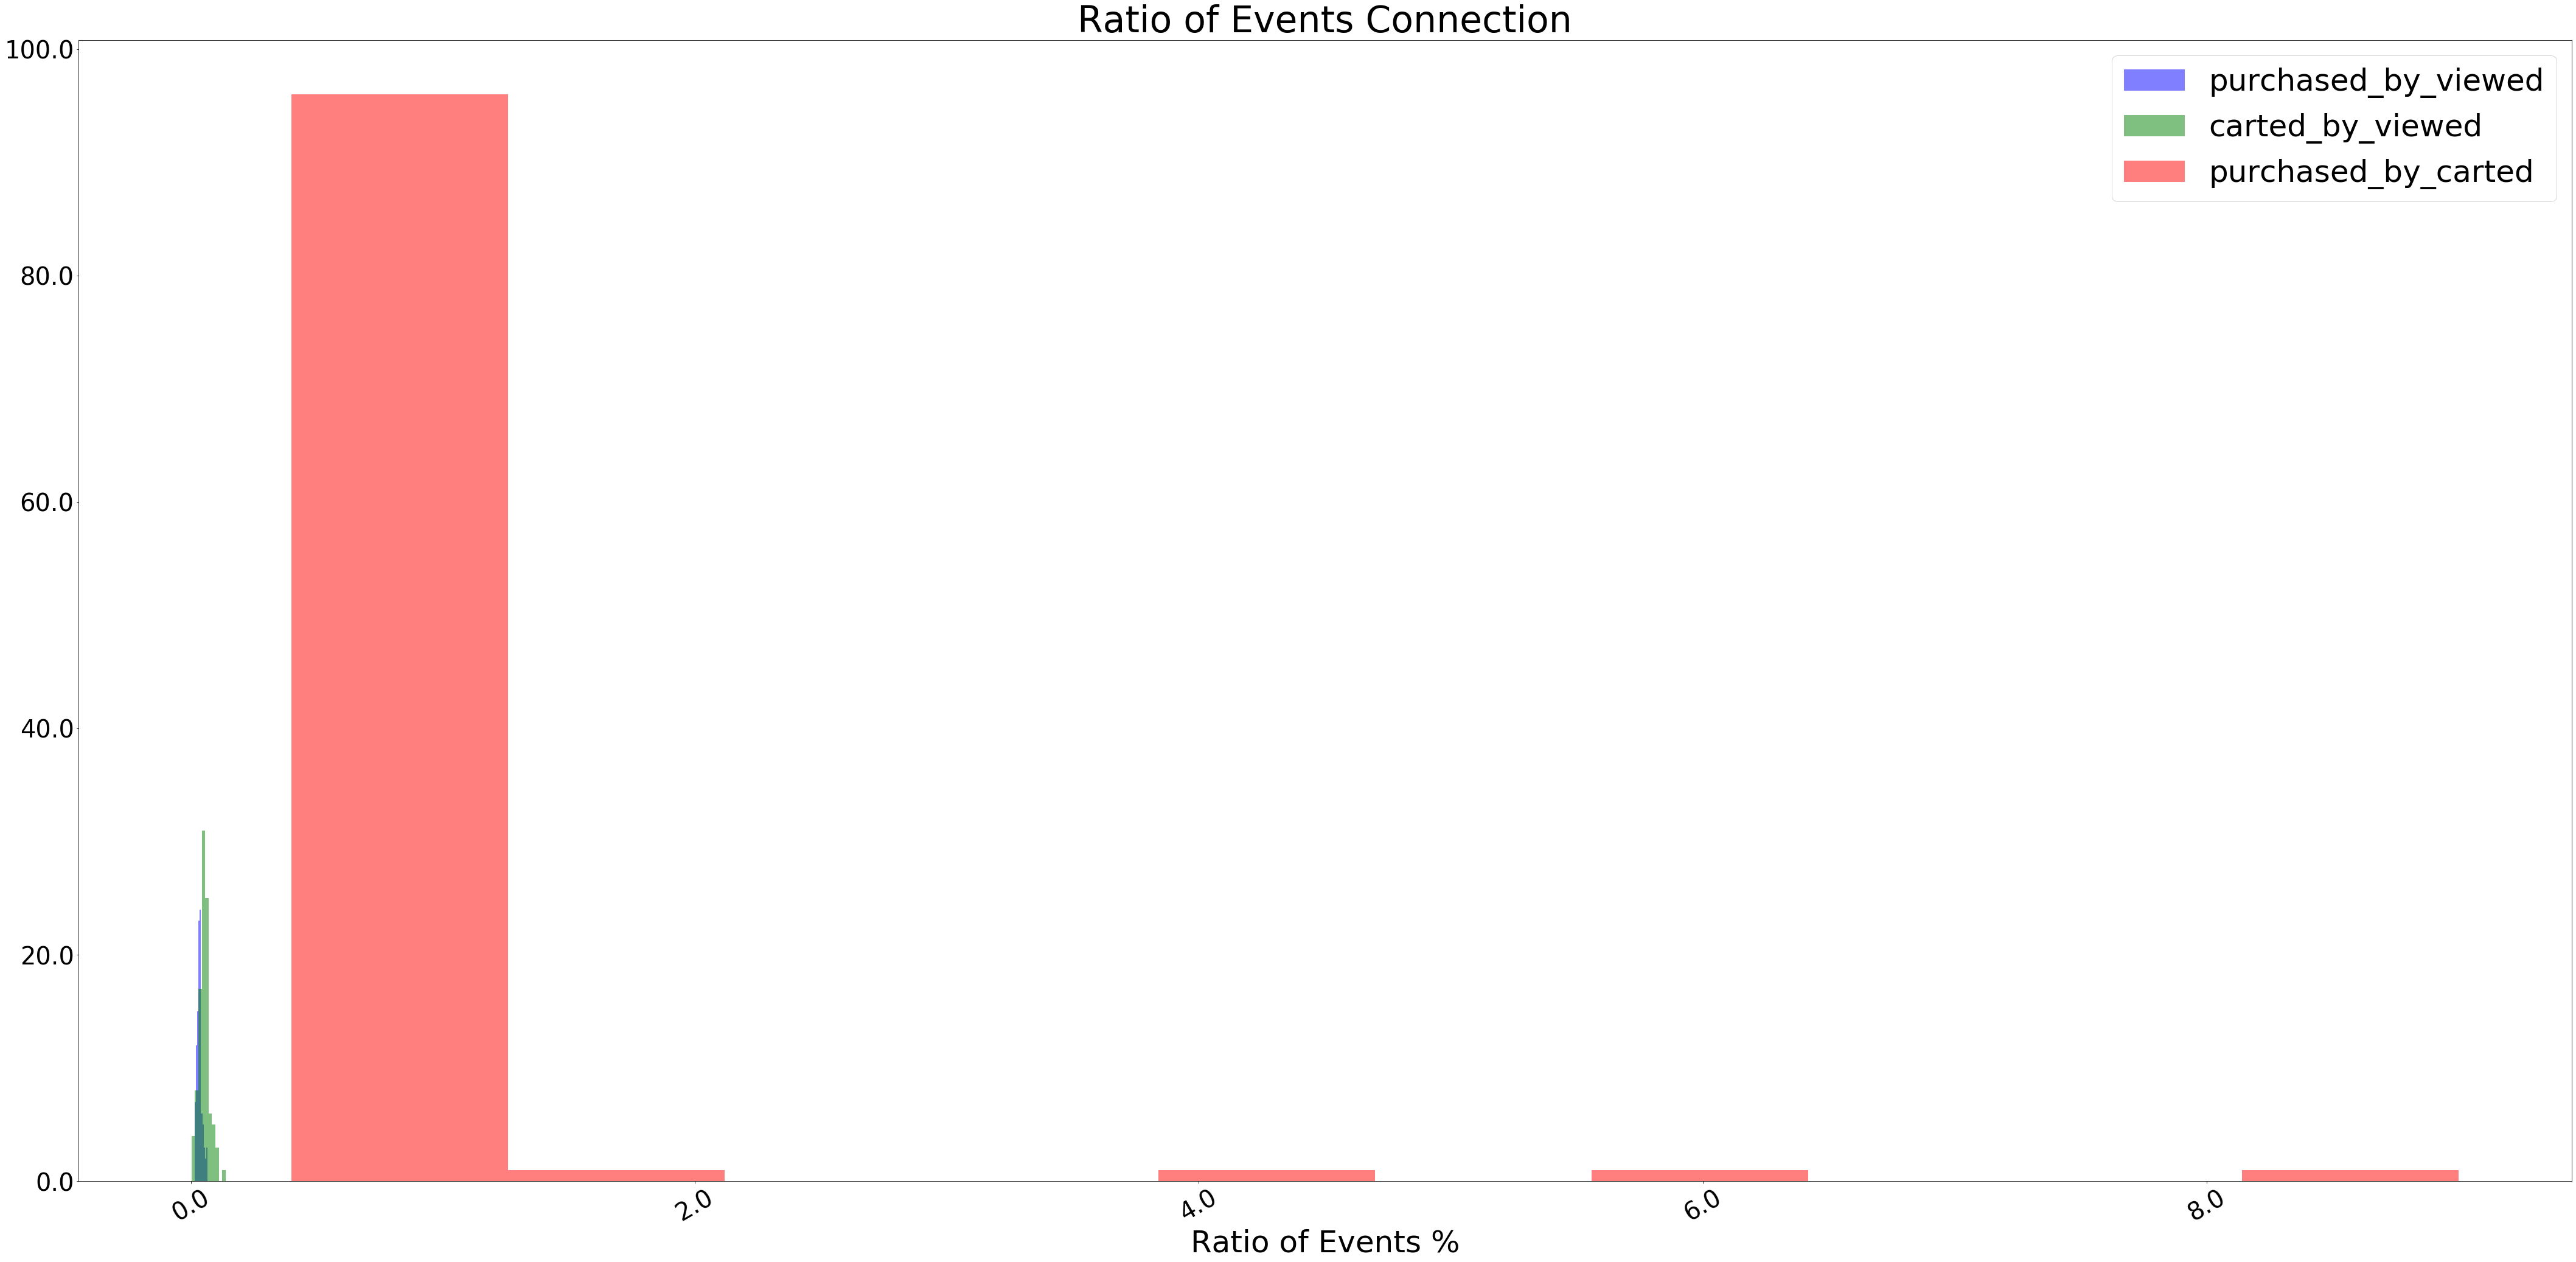

In [7]:
# Ratio of each products being Viewed and purchased 
f, ax = plt.subplots(figsize=(60, 30))

plt.hist(purchased_by_viewed, color="b", bins = 10, alpha = 0.5, label ='purchased_by_viewed')
plt.hist(carted_by_viewed, color="g", bins = 10, alpha = 0.5, label ='carted_by_viewed')
plt.hist(purchased_by_carted, color="r", bins = 10, alpha = 0.5, label ='purchased_by_carted')

ax.set_title("Ratio of Events Connection", fontsize = 60)
ax.set_xlabel("Ratio of Events %", fontsize = 50)
ax.set_ylabel("", fontsize = 50)
# ax.set_xticklabels(['{:,.1%}'.format(x) for x in xvals], rotation = 30, size = 30)
xvals = ax.get_xticks()
ax.set_xticklabels(['{:,.2}'.format(x) for x in xvals], rotation = 30, size = 40)
yvals = ax.get_yticks()
ax.set_yticklabels(yvals, size = 40)
plt.legend(prop={'size':50})
f.tight_layout(pad=5.0)
plt.show()

About 10% items in cart will be purchased. Only 1~2% items will put in cart after been viewed.
To view it clearly, I am going to do subplot for each event.

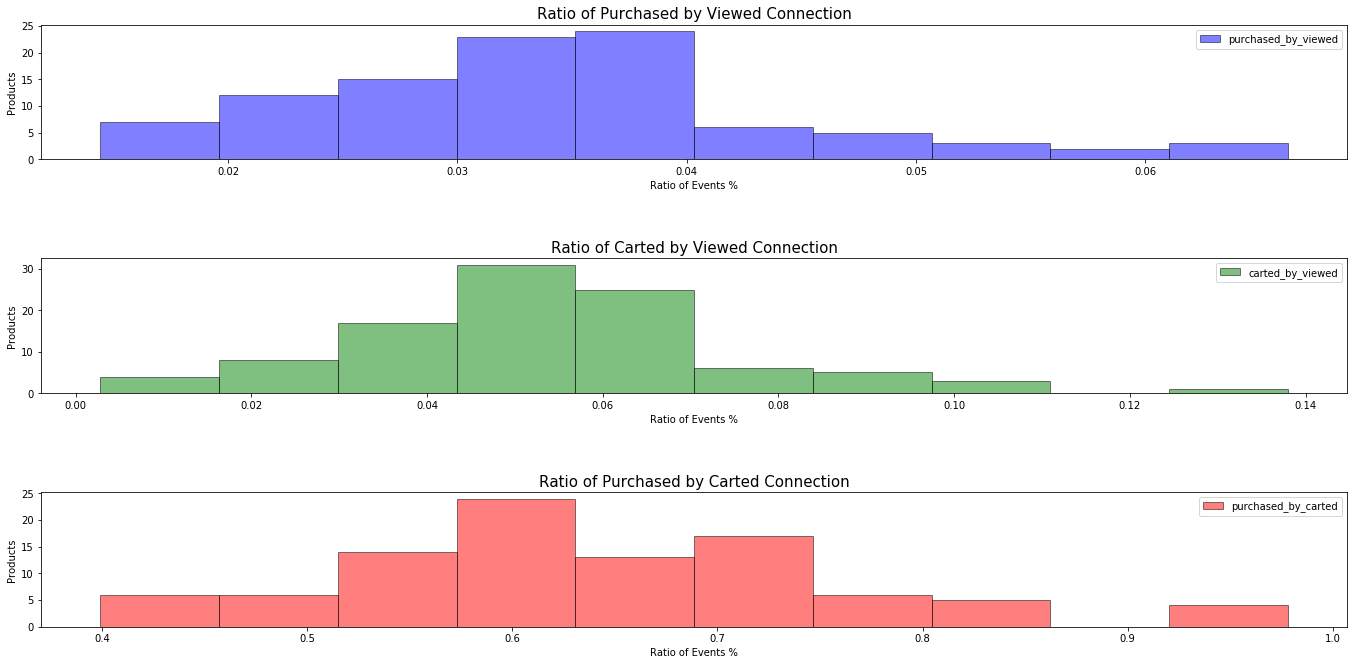

In [8]:
# Ratio of each products being Viewed and purchased 
f, ax = plt.subplots(figsize=(20, 10))

ax = plt.subplot(311)
plt.hist(purchased_by_viewed, color="b", bins = 10, alpha = 0.5, label ='purchased_by_viewed', ec ='black')
#plt.plot(purchased_by_viewed, color="r")
ax.set_title("Ratio of Purchased by Viewed Connection", fontsize = 15)
ax.set_xlabel("Ratio of Events %", fontsize = 10,size =10)
ax.set_ylabel("Products", fontsize = 10,size =10)
ax.legend(prop={'size':10})
f.tight_layout(pad=5.0)

ax = plt.subplot(312)
plt.hist(carted_by_viewed, color="g", bins = 10, alpha = 0.5, label = 'carted_by_viewed', ec ='black')
ax.set_title("Ratio of Carted by Viewed Connection", fontsize = 15)
ax.set_xlabel("Ratio of Events %", fontsize = 10,size =10)
ax.set_ylabel("Products", fontsize = 10,size =10)
ax.legend(prop={'size':10})
f.tight_layout(pad=5.0)

ax = plt.subplot(313)
plt.hist(purchased_by_carted[purchased_by_carted <= 1], color="r", bins = 10, alpha = 0.5, label ='purchased_by_carted', ec ='black')
ax.set_title("Ratio of Purchased by Carted Connection", fontsize = 15)
ax.set_xlabel("Ratio of Events %", fontsize = 10,size =10)
ax.set_ylabel("Products", fontsize = 10,size =10)
ax.legend(prop={'size':10})

The shape of three behaviors are similar to normal distribution, the ratios are reasonable.

In [230]:
carted_by_viewed

product_id
1002524     0.073329
1002532     0.055195
1002544     0.078391
1002547     0.063923
1002629     0.062162
              ...   
5100572     0.047282
5100816     0.098828
10701101    0.137981
12703015    0.029628
12703498    0.005326
Length: 100, dtype: float64

In [235]:
df[df['product_id'] == 1002532]

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id
30809,611352,2019-10-01 12:06:13 UTC,view,1002532,electronics.smartphone,apple,591.78,537066972
30810,2716935,2019-10-03 07:23:36 UTC,view,1002532,electronics.smartphone,apple,591.78,541148070
30811,1977135,2019-10-02 13:59:09 UTC,view,1002532,electronics.smartphone,apple,591.78,522900786
30812,4146161,2019-10-04 10:24:32 UTC,view,1002532,electronics.smartphone,apple,591.78,556683162
30813,3958737,2019-10-04 08:05:00 UTC,cart,1002532,electronics.smartphone,apple,591.78,546847150
...,...,...,...,...,...,...,...,...
5025180,3618918,2019-11-03 09:43:46 UTC,view,1002532,electronics.smartphone,apple,565.01,512909139
5025181,3172791,2019-11-03 04:41:19 UTC,view,1002532,electronics.smartphone,apple,565.01,512469495
5025182,2390403,2019-11-02 14:11:46 UTC,view,1002532,electronics.smartphone,apple,532.57,558436128
5025183,124107,2019-11-01 04:18:08 UTC,view,1002532,electronics.smartphone,apple,532.57,513421588


In [9]:
# Check label by minimum product_id
purchased_by_carted.idxmin()

5100816

In [11]:
df[df['product_id'] == 5100816]

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id
2656572,1459844,2019-10-02 05:51:50 UTC,view,5100816,non-avaliable,xiaomi,29.56,512838100
2656573,4920661,2019-10-04 19:51:17 UTC,view,5100816,non-avaliable,xiaomi,28.55,551441616
2656574,2383712,2019-10-02 19:38:35 UTC,view,5100816,non-avaliable,xiaomi,29.54,512849419
2656575,4365677,2019-10-04 13:06:29 UTC,cart,5100816,non-avaliable,xiaomi,28.56,512415400
2656576,2330302,2019-10-02 18:24:44 UTC,view,5100816,non-avaliable,xiaomi,29.54,514342392
...,...,...,...,...,...,...,...,...
7574381,2969430,2019-11-02 21:31:08 UTC,view,5100816,non-avaliable,xiaomi,29.55,552249400
7574382,164366,2019-11-01 04:56:14 UTC,view,5100816,non-avaliable,xiaomi,29.58,532687241
7574383,4976248,2019-11-04 06:53:21 UTC,view,5100816,non-avaliable,xiaomi,29.56,566862424
7574384,2329241,2019-11-02 13:32:09 UTC,view,5100816,non-avaliable,xiaomi,29.55,532037014


In [10]:
# Check label by maximum_id
purchased_by_carted.idxmax()

1005186

In [227]:
df[df['product_id'] == 1005186].tail()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id
6208692,2552750,2019-11-02 15:49:27 UTC,view,1005186,electronics.smartphone,samsung,771.94,566216830
6208693,3051297,2019-11-03 02:38:42 UTC,view,1005186,electronics.smartphone,samsung,771.94,528989034
6208694,2540958,2019-11-02 15:42:42 UTC,view,1005186,electronics.smartphone,samsung,771.94,545774529
6208695,2157656,2019-11-02 11:29:52 UTC,view,1005186,electronics.smartphone,samsung,771.94,513695979
6208696,2120292,2019-11-02 11:03:52 UTC,view,1005186,electronics.smartphone,samsung,771.94,512963601


Three shapes of ratio of events is similar to a normal distribution,therefore, we can conclude that most online shopping users operate in accordance with general shopping habits. 

In [20]:
# products been view and purchase comparing
viewed_all = df.groupby(by = 'product_id')['event_type'].apply(lambda x: (x =='view').sum()).reset_index(name = 'count').sort_values(['count'], ascending=False).head(100)
carted_all = df.groupby(by = 'product_id')['event_type'].apply(lambda x: (x =='cart').sum()).reset_index(name = 'count').sort_values(['count'], ascending=False).head(100)
purchased_all = df.groupby(by = 'product_id')['event_type'].apply(lambda x: (x =='purchase').sum()).reset_index(name = 'count').sort_values(['count'],ascending=False).head(100)
type(carted_all.count)

method

In [21]:
#ratio of each event by total events
totalevent = (purchased_all['count']+ viewed_all['count'] + carted_all['count']).dropna()
# totalevent = totalevent.dropna()

ratio_purchase = (purchased_all['count']/ totalevent).dropna()  
ratio_view = (viewed_all['count']/ totalevent).dropna()  
ratio_cart = (carted_all['count']/ totalevent).dropna()  


Now check whether the frequency of the three behaviors is normal and whether the proportion is 
reasonable：

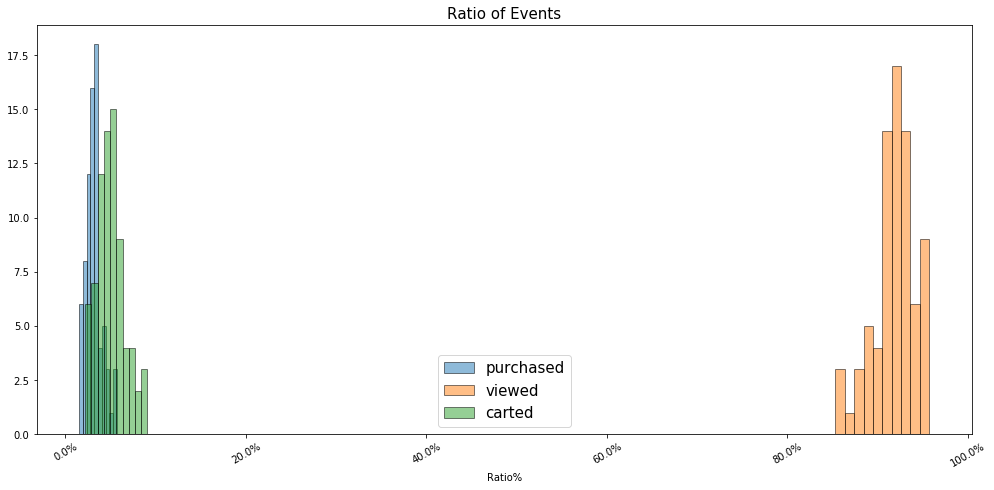

In [22]:
# Ratio of each event
f, ax = plt.subplots(figsize=(15, 8))

plt.hist(ratio_purchase, bins = 10, alpha = 0.5, label ='purchased', ec = 'black')
plt.hist(ratio_view, bins = 10, alpha = 0.5, label ='viewed', ec = 'black')
plt.hist(ratio_cart, bins = 10, alpha = 0.5, label ='carted', ec = 'black')

ax.set_title("Ratio of Events", fontsize = 15)
ax.set_xlabel("Ratio%", fontsize = 10)
ax.set_ylabel("", fontsize = 10)
# ax.set_xticklabels(['{:,.1%}'.format(x) for x in xvals], rotation = 30, size = 30)
xvals = ax.get_xticks()
ax.set_xticklabels(['{:,.1%}'.format(x) for x in xvals], rotation = 30, size = 10)
yvals = ax.get_yticks()
ax.set_yticklabels(yvals, size = 10)
plt.legend(prop={'size':15})
f.tight_layout(pad=5.0)
plt.show()

The plots of ratio of three events by total are close to normal distrobution. 
The proportion of the three user behaviors is in line with the conclusions obtained above

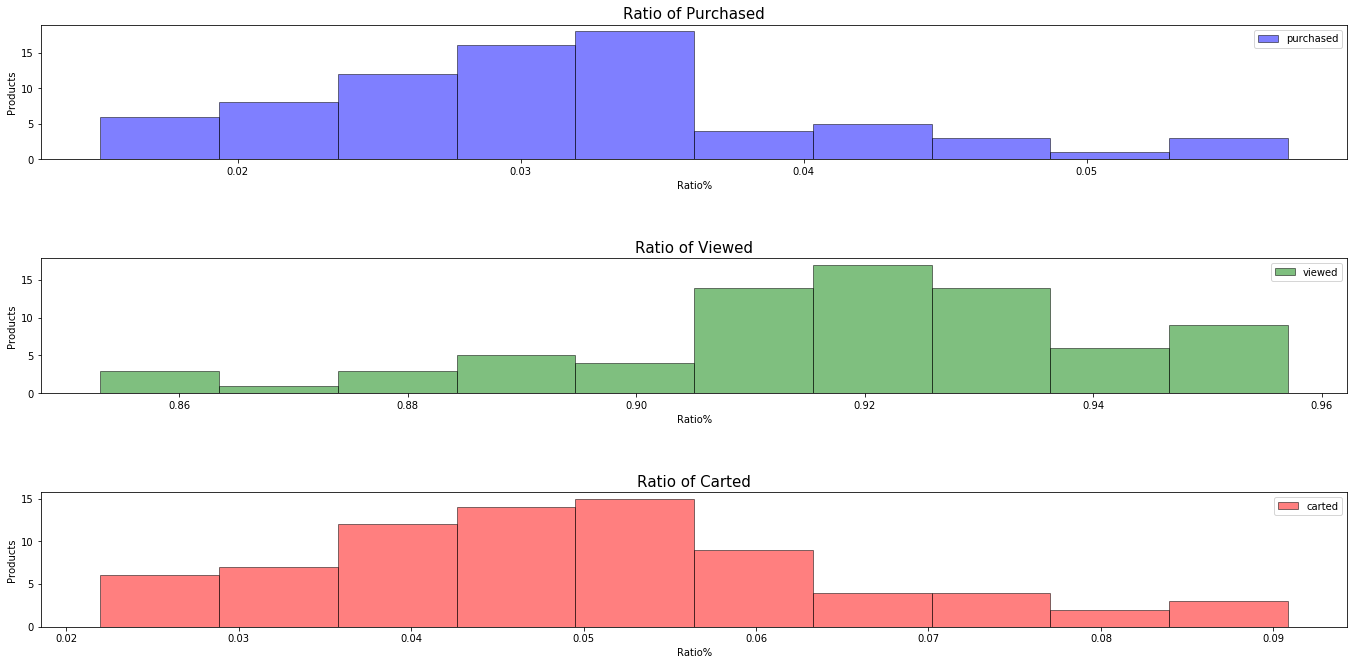

In [23]:
# Ratio of each event
f, ax = plt.subplots(figsize=(20, 10))

ax = plt.subplot(311)
plt.hist(ratio_purchase, color="b", bins = 10, alpha = 0.5, label ='purchased', ec ='black')
#plt.plot(purchased_by_viewed, color="r")
ax.set_title("Ratio of Purchased", fontsize = 15)
ax.set_xlabel("Ratio%", fontsize = 10,size =10)
ax.set_ylabel("Products", fontsize = 10,size =10)
ax.legend(prop={'size':10})
f.tight_layout(pad=5.0)

ax = plt.subplot(312)
plt.hist(ratio_view, color="g", bins = 10, alpha = 0.5, label = 'viewed', ec ='black')
ax.set_title("Ratio of Viewed", fontsize = 15)
ax.set_xlabel("Ratio%", fontsize = 10,size =10)
ax.set_ylabel("Products", fontsize = 10,size =10)
ax.legend(prop={'size':10})
f.tight_layout(pad=5.0)

ax = plt.subplot(313)
plt.hist(ratio_cart, color="r", bins = 10, alpha = 0.5, label ='carted', ec ='black')
ax.set_title("Ratio of Carted", fontsize = 15)
ax.set_xlabel("Ratio%", fontsize = 10,size =10)
ax.set_ylabel("Products", fontsize = 10,size =10)
ax.legend(prop={'size':10})

The shape of three behaviors are similar to normal distribution, the ratios are reasonable.


Next, I am interested to analysis customer's behaviors happened by time. 
How about collect events happens in hourly, put whole events in 24 hours? After analysis it, we will find out the regular of events happen daily.
To implement it, first of all, I need to only keep the hours in 'event_time'.

In [142]:
time_events = pd.pivot_table(df, index='event_time', columns='event_type', values='price', aggfunc='count',fill_value = 0).reset_index()
time_events.tail()

time_valid = time_events.loc[(time_events.purchase > 1) | (time_events.view > 1) | (time_events.cart > 1)].sort_values(by=['event_time'], ascending = True)
time_valid['event_time']

0         2019-10-01 00:00:00 UTC
1         2019-10-01 00:00:01 UTC
4         2019-10-01 00:00:08 UTC
6         2019-10-01 00:00:11 UTC
11        2019-10-01 00:00:18 UTC
                   ...           
617990    2019-11-04 07:08:59 UTC
617991    2019-11-04 07:09:00 UTC
617992    2019-11-04 07:09:01 UTC
617993    2019-11-04 07:09:02 UTC
617994    2019-11-04 07:09:03 UTC
Name: event_time, Length: 596112, dtype: object

In [143]:
#check the type of 'event_time'
type(time_valid.event_time[0])

str

In [145]:
#modified the format of 'event_time', remove the date from it.
t = time_valid['event_time'].apply(lambda x: x.split(" ",2)[1])
time_valid['hourofday'] = t.apply(lambda x: x.split(":")[0])
type(time_valid['hourofday'])

pandas.core.series.Series

In [204]:
# time_valid['hourofday'] = time_valid.event_time.apply(lambda x: x.split(' ')[0])
time_valid.event_time = time_valid['hourofday']
time_valid.head()
type(time_valid.event_time[0])

str

Done to modified the format of 'event_time' to only hours.

Let's start to do analysis of customer's behaviors in 24 hours.

In [259]:
# Event happend time with customer behaviors
product_purchasevalid_time = time_valid.loc[time_valid.purchase > 1].sort_values(['purchase'], ascending = False).head(100)
purchase_bytime = product_purchasevalid_time.groupby(by = 'event_time')['purchase'].sum().reset_index()
# purchase_bytime.purchase = purchase_bytime['purchase'].apply(lambda x: str(x))
purchase_bytime.columns = ['event_time','purchase']

product_viewvalid_time = time_valid.loc[time_valid.view > 1].sort_values(by=['view'], ascending = False).head(100)
view_bytime = product_viewvalid_time.groupby(by = 'event_time')['view'].sum().reset_index()
# view_bytime.view = view_bytime['view'].apply(lambda x: str(x))
view_bytime.columns = ['event_time','view']

product_cartvalid_time = time_valid.loc[time_valid.cart > 1].sort_values(by=['cart'], ascending = False).head(100)
cart_bytime = product_cartvalid_time.groupby(by = 'event_time')['cart'].sum().reset_index()
# cart_bytime.cart = cart_bytime['cart'].apply(lambda x: str(x))
cart_bytime.columns = ['event_time','cart']

view_bytime.view.max()
cart_bytime

,event_time,cart
0,04,58
1,05,49
2,06,37
3,07,89
4,08,91
5,09,48
6,10,45
7,11,71
8,12,73
9,13,17


In [206]:
type(purchase_bytime.purchase[0])

numpy.int64

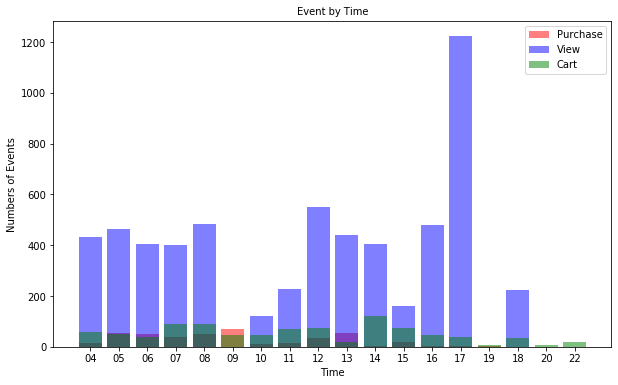

In [257]:
# Draw bar plot to show three events in the day
f, ax = plt.subplots(figsize=(10, 6))

a = purchase_bytime[purchase_bytime['event_time']!='']['purchase']
b = purchase_bytime[purchase_bytime['event_time']!='']['event_time']
plt.bar(b, a, color = 'r', alpha = 0.5, label = 'Purchase')

c = view_bytime[view_bytime['event_time']!='']['view']
d = view_bytime[view_bytime['event_time']!='']['event_time']
plt.bar(d,c, color = 'b', alpha = 0.5, label = 'View')

e = cart_bytime[cart_bytime['event_time']!='']['cart']
f = cart_bytime[cart_bytime['event_time']!='']['event_time']
plt.bar(f, e ,color = 'g', alpha = 0.5, label = 'Cart')

ax.set_title("Event by Time", fontsize = 10)
ax.set_xlabel("Time", fontsize = 10)
ax.set_ylabel("Numbers of Events", fontsize = 10)

plt.legend(prop={'size':10})
plt.show()

'View' event with the highest frequency in 24 hours. The most 'View' happended at 17:00.
Most 'Purchase' happended at 9:00, most 'Cart' happended at 14:00.

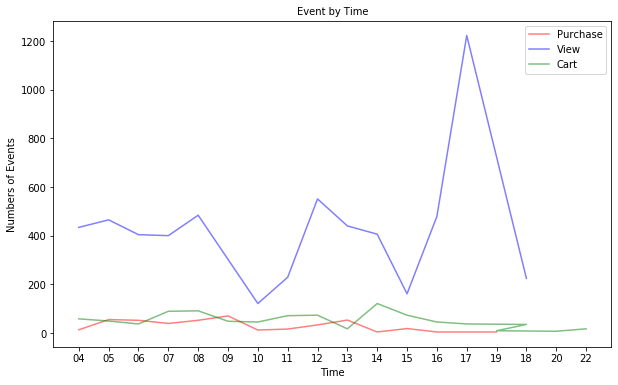

In [258]:
#Draw a linear plot to show three events in the day
f, ax = plt.subplots(figsize=(10, 6))

a = purchase_bytime[purchase_bytime['event_time']!='']['purchase']
b = purchase_bytime[purchase_bytime['event_time']!='']['event_time']
plt.plot(b, a, color = 'r', alpha = 0.5, label = 'Purchase')

c = view_bytime[view_bytime['event_time']!='']['view']
d = view_bytime[view_bytime['event_time']!='']['event_time']
plt.plot(d,c, color = 'b', alpha = 0.5, label = 'View')

e = cart_bytime[cart_bytime['event_time']!='']['cart']
f = cart_bytime[cart_bytime['event_time']!='']['event_time']
plt.plot(f, e ,color = 'g', alpha = 0.5, label = 'Cart')

ax.set_title("Event by Time", fontsize = 10)
ax.set_xlabel("Time", fontsize = 10)
ax.set_ylabel("Numbers of Events", fontsize = 10)

plt.legend(prop={'size':10})
plt.show()

The linear plot will show the daily customer behaviors clearly. 'View' occupy the top position in the day: 100 ~ 1300 times per day.  The frequency of 'Cart' and 'Purchase' less than 200 times per day.